# Posed as a challenge on reddit/r/python. I'll clean it up soon!

## The challenge was presented as follows:

>Our goal is calculate pi (the irrational number, if you're not familiar with the notion of pi) but we must do it a very specific way. First, we construct an algorithm that plots n points in quadrant one, between 0 and 1. In other words, each n will have an (x, y) where x and y both range from 0 to 1. Now, we construct an algorithm to find out whether that point is above or below sqrt(1-x2). At this point, we are less concerned about the values (in fact, we are entirely disconcerned with the values), we need only a number of points below sqrt(1-x2)...we'll call this nBelow. Now, if we take the ratio of nBelow/n...we should get pi/4 as the total number of points get large. Multiplying this by 4, we should get pi. The main idea is that as n goes to infinity, nBelow/n = pi/4. Now we need to graph this. The graph will have 0 - 1000000, or possibly bigger if the program needs more values to properly converge, on the x-axis and log10(|1-(x/math.pi)|) on the y-axis. The x in the logarithm is the 4 times nBelow/n which equals pi.

Hope this helps!

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
# A generator that continually does the following
# -Selects a random point in the first quadrant from X=(0,1), Y =(0,1)
# -Determines if it falls below the function (1-x^2)^.5
# -Appends the result (True or False) to a running list of results
# -Spits out the current percentage of Trues after 1000 iterations

def ratio_gen():
    # determines if a point is below the line
    def is_below_func(x, y):
        if (1 - x**2)**.5 >= y:
            return True
        return False
    
    results = []
    while True:
        for _ in xrange(1000):
            results.append(is_below_func(random(), random()))
        yield np.mean(results)
        
#Optimize this later

In [5]:
# Pops out the running ratio, multiplies it by 4, appends it to a list

# Note that the ratio is taken after 1000 iterations, so this list
# will contain the running ratio of 2,000,000 points

g = ratio_gen()
ratios = [4 * next(g) for _ in xrange(2000)]

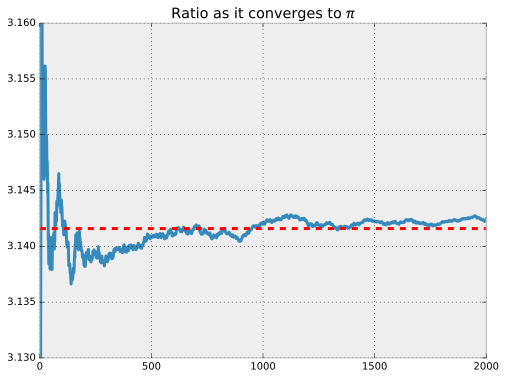

In [14]:
plt.rcParams['figure.figsize'] = 8, 6
plt.plot(ratios, linewidth=3)
plt.ylim([3.13,3.16])
plt.title(u'Ratio as it converges to π')
_ = plt.axhline(y=np.pi, linestyle='dashed', color='red', linewidth=3)

So far so good, the ration of points above and below the line, times 4, is converging on pi :-)

Now lets plug it into the second formula (a loss function) $log_{10}(|1 - \frac{ratio}{ pi}| )$.

In [15]:
# The second function
def log10_func(num):
    return np.log10(abs(1 - num / np.pi))

In [16]:
# List comprehension that created a new list containing the ratios
# plugged into the second formula
log_10_results = [log10_func(x) for x in ratios]

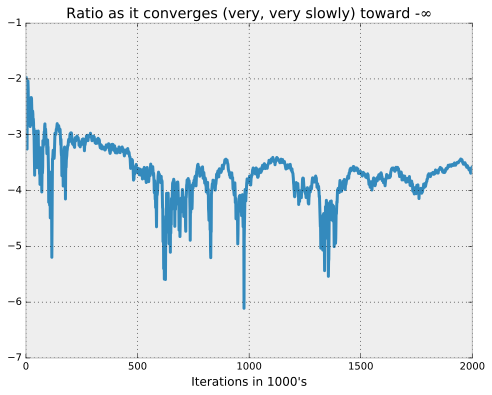

In [17]:
plt.plot(log_10_results, linewidth=3)
plt.xlabel('Iterations in 1000\'s')
_ = plt.title(u'Ratio as it converges (very, very slowly) toward -∞')

The results of plugging the ratios into the formula are a bit underwhelming, but such is the nature of logs. If we are within .0001 of π, the y value is only -4.

The weird icicle sections come from the ratio oscillating around pi. When the $(ratio/pi)$ is VERY close to 1, we are essentially taking log 10 of 0 which is -∞. So the y value shoots down and back up again as it crosses the axis. We can still see that the general trend, though, is for the value to decrease at a logrithmic rate